In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import json
import missingno as msno

In [2]:
loc_df = pd.read_csv('../../data/raw/WFIGS_-_Wildland_Fire_Locations_Full_History (3).csv')

C:\Users\jeffr\AppData\Local\Temp\ipykernel_28308\3980904035.py:1: DtypeWarning: Columns (14,16,20,21,23,32,46,55,61,77,78,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  loc_df = pd.read_csv('../../data/raw/WFIGS_-_Wildland_Fire_Locations_Full_History (3).csv')


In [4]:
loc_df['FireDiscoveryDateTime'] = pd.to_datetime(loc_df['FireDiscoveryDateTime'])
loc_df = loc_df[loc_df['FireDiscoveryDateTime']>='2020-01-01']
loc_df = loc_df[loc_df['IncidentTypeCategory'] == 'WF']

In [5]:
loc_df.shape

(22799, 96)

In [6]:
loc_df.sort_values('FireDiscoveryDateTime')
loc_df.reset_index(drop = True, inplace = True)

In [7]:
loc_df.isnull().sum()

X                         0
Y                         0
OBJECTID                  0
ABCDMisc              19795
ADSPermissionState        0
                      ...  
Source                    0
GlobalID                  0
IsCpxChild            12715
CpxName               22745
CpxID                 22745
Length: 96, dtype: int64

In [8]:
loc_df['ContainmentDateTime'].isnull().sum()

325

In [9]:
loc_df['DailyAcres'].isnull().sum()

223

In [10]:
loc_df = loc_df[loc_df['DailyAcres'].isnull() == False]
loc_df = loc_df[loc_df['ContainmentDateTime'].isnull() == False]

In [11]:
loc_df.shape

(22251, 96)

In [12]:
df = loc_df[['X', 'Y', 'ContainmentDateTime', 'ControlDateTime', 'DailyAcres',
       'DiscoveryAcres', 'FireCause', 'FireDiscoveryDateTime',
       'IncidentTypeCategory', 'IncidentTypeKind', 'InitialLatitude',
       'InitialLongitude', 'IrwinID', 'LocalIncidentIdentifier', 'POOCounty',
       'POODispatchCenterID', 'POOFips', 'POOState', 'UniqueFireIdentifier']].copy()

<AxesSubplot: >

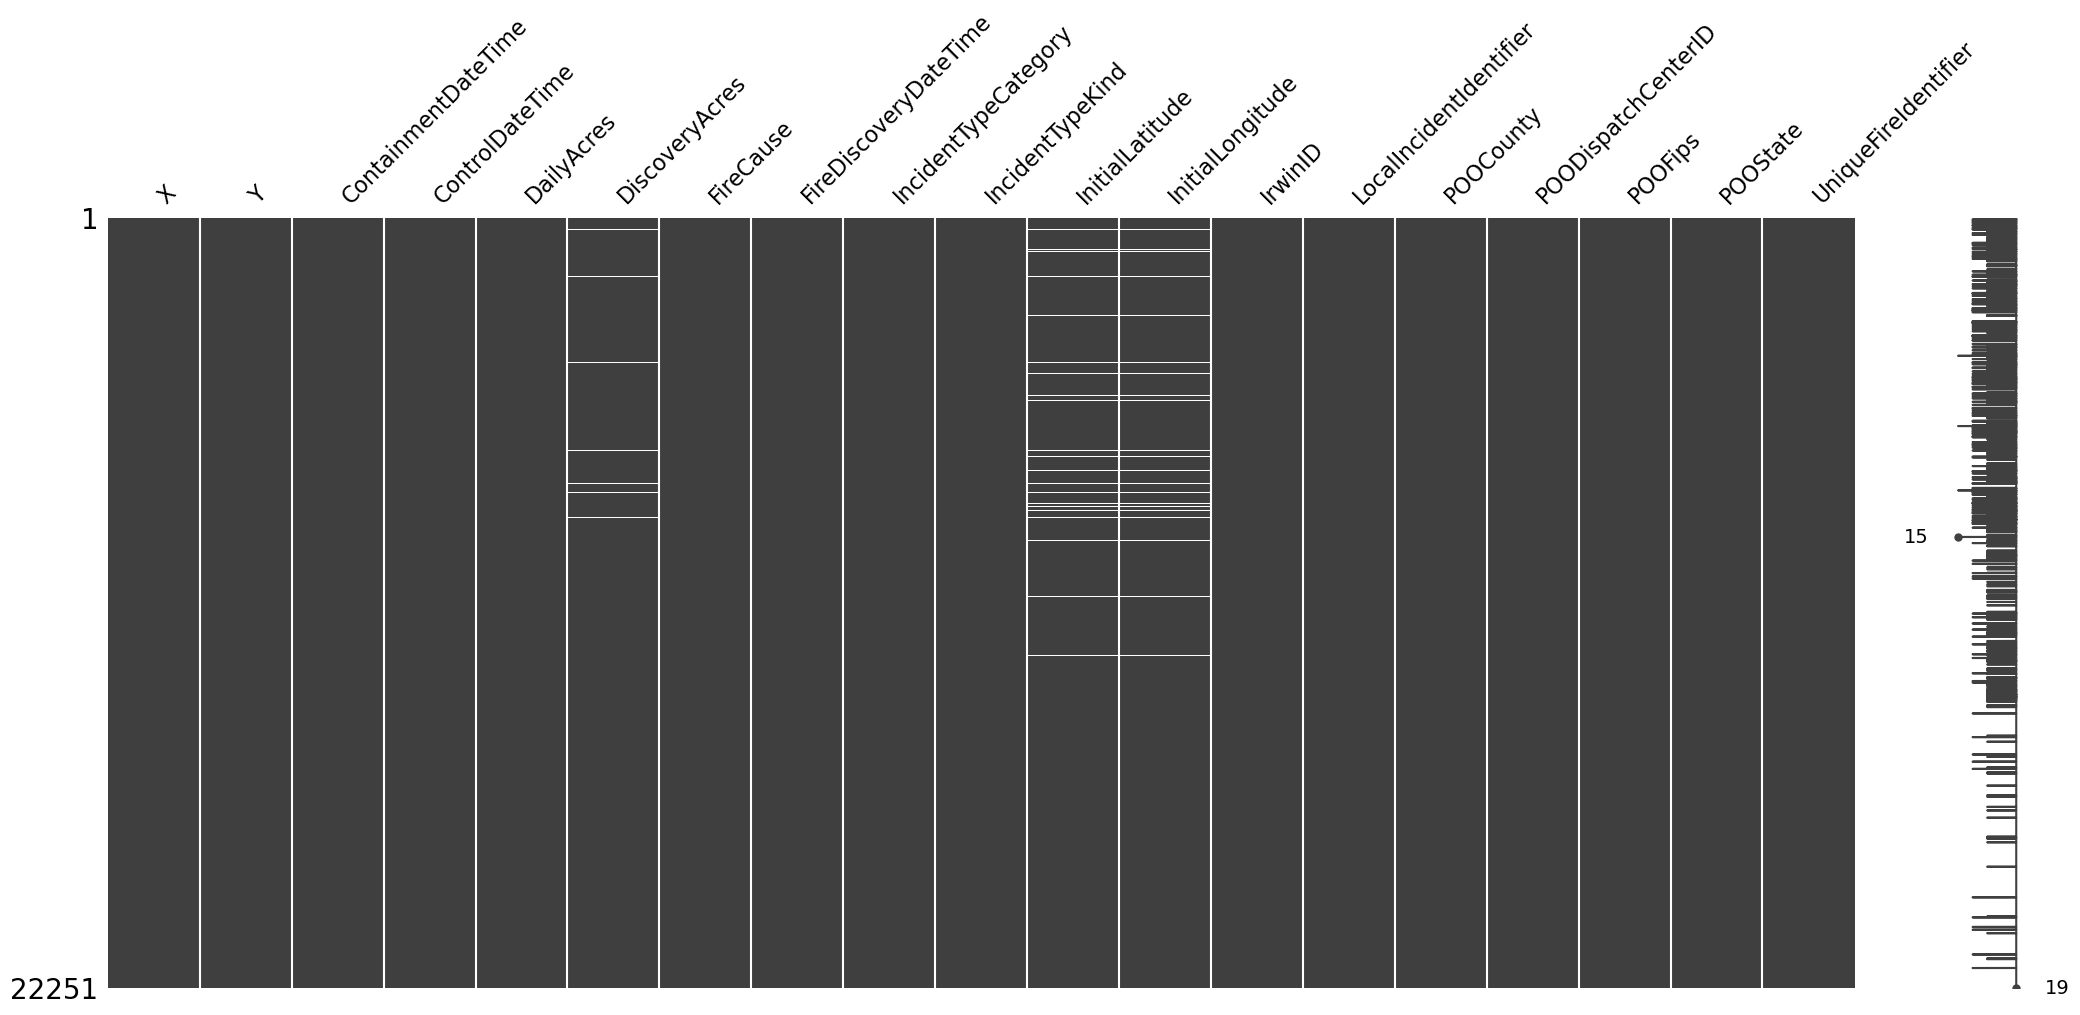

In [13]:
msno.matrix(df)

In [14]:
df.isnull().sum()

X                            0
Y                            0
ContainmentDateTime          0
ControlDateTime              0
DailyAcres                   0
DiscoveryAcres             196
FireCause                   12
FireDiscoveryDateTime        0
IncidentTypeCategory         0
IncidentTypeKind             0
InitialLatitude            709
InitialLongitude           709
IrwinID                      0
LocalIncidentIdentifier      0
POOCounty                    0
POODispatchCenterID          0
POOFips                      0
POOState                     0
UniqueFireIdentifier         0
dtype: int64

In [15]:
df.dropna(inplace = True)

In [16]:
df.shape

(21541, 19)

In [17]:
df.dtypes

X                                      float64
Y                                      float64
ContainmentDateTime                     object
ControlDateTime                         object
DailyAcres                             float64
DiscoveryAcres                         float64
FireCause                               object
FireDiscoveryDateTime      datetime64[ns, UTC]
IncidentTypeCategory                    object
IncidentTypeKind                        object
InitialLatitude                        float64
InitialLongitude                       float64
IrwinID                                 object
LocalIncidentIdentifier                 object
POOCounty                               object
POODispatchCenterID                     object
POOFips                                 object
POOState                                object
UniqueFireIdentifier                    object
dtype: object

In [18]:
df['ContainmentDateTime'] = pd.to_datetime(df['ContainmentDateTime'])
df['ControlDateTime'] = pd.to_datetime(df['ControlDateTime'])

In [23]:
#df.to_csv('./data/cleaned_dataset.csv', index = False)

In [19]:
df.head()

,X,Y,ContainmentDateTime,ControlDateTime,DailyAcres,DiscoveryAcres,FireCause,FireDiscoveryDateTime,IncidentTypeCategory,IncidentTypeKind,InitialLatitude,InitialLongitude,IrwinID,LocalIncidentIdentifier,POOCounty,POODispatchCenterID,POOFips,POOState,UniqueFireIdentifier
0,-111.348611,33.195755,2020-07-23 05:29:59+00:00,2020-07-23 05:29:59+00:00,8.0,2.5,Human,2020-07-22 21:51:00+00:00,WF,FI,33.195810,-111.348700,{951823FA-0B72-4295-87C8-E042D602324E},001450,Pinal,AZTDC,04021,US-AZ,2020-AZA3S-001450
1,-115.748812,40.617506,2020-08-03 23:00:00+00:00,2020-09-02 15:00:00+00:00,5985.9,5.0,Natural,2020-07-19 23:00:00+00:00,WF,FI,40.602563,-115.719777,{91E0CBAB-A24E-4590-B6C6-2B4A46907E8A},010145,Elko,NVEIC,32007,US-NV,2020-NVECFX-010145
3,-108.193611,39.858486,2020-08-30 00:00:00+00:00,2020-09-10 14:00:00+00:00,0.1,1.0,Natural,2020-08-29 21:46:00+00:00,WF,FI,39.891710,-108.266500,{3568D344-E3FB-415C-8014-ED34ECEAAB25},000323,Rio Blanco,COCRC,08103,US-CO,2020-COWRD-000323
4,-109.703111,40.227646,2020-10-28 20:15:00+00:00,2020-10-28 20:15:00+00:00,0.1,0.1,Human,2020-10-28 19:37:00+00:00,WF,FI,40.227700,-109.703169,{4BEBC503-DACD-4198-A1D8-323B614DA555},100463,Uintah,UTUBC,49047,US-UT,2020-UTNES-100463
5,-110.385511,31.961145,2020-07-10 18:14:59+00:00,2020-07-10 18:14:59+00:00,0.1,0.1,Human,2020-07-09 16:34:59+00:00,WF,FI,31.961200,-110.385600,{FB125AAC-0DE2-4547-A2D3-32891D98CB0F},001263,Cochise,AZTDC,04003,US-AZ,2020-AZA3S-001263


In [20]:
weather = pd.read_csv('https://raw.githubusercontent.com/General-Assembly-Group-Project/Wild-Fire-Analysis/dev/data/raw/meteo_weather.csv', index_col = 'Unnamed: 0')

In [21]:
weather.head()

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,lat,long,id,index,station
0,2020-07-22,35.4,30.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.195810,-111.348700,0,NaN,NaN
1,2020-07-23,30.6,27.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.195810,-111.348700,0,NaN,NaN
0,2020-07-19,25.9,14.4,35.6,0.0,NaN,NaN,8.0,NaN,1013.1,NaN,40.602563,-115.719777,1,NaN,NaN
1,2020-07-20,26.3,13.3,35.6,0.0,NaN,NaN,5.7,NaN,1012.4,NaN,40.602563,-115.719777,1,NaN,NaN
2,2020-07-21,25.3,15.0,33.9,0.0,NaN,359.0,9.0,NaN,1010.6,NaN,40.602563,-115.719777,1,NaN,NaN


<AxesSubplot: >

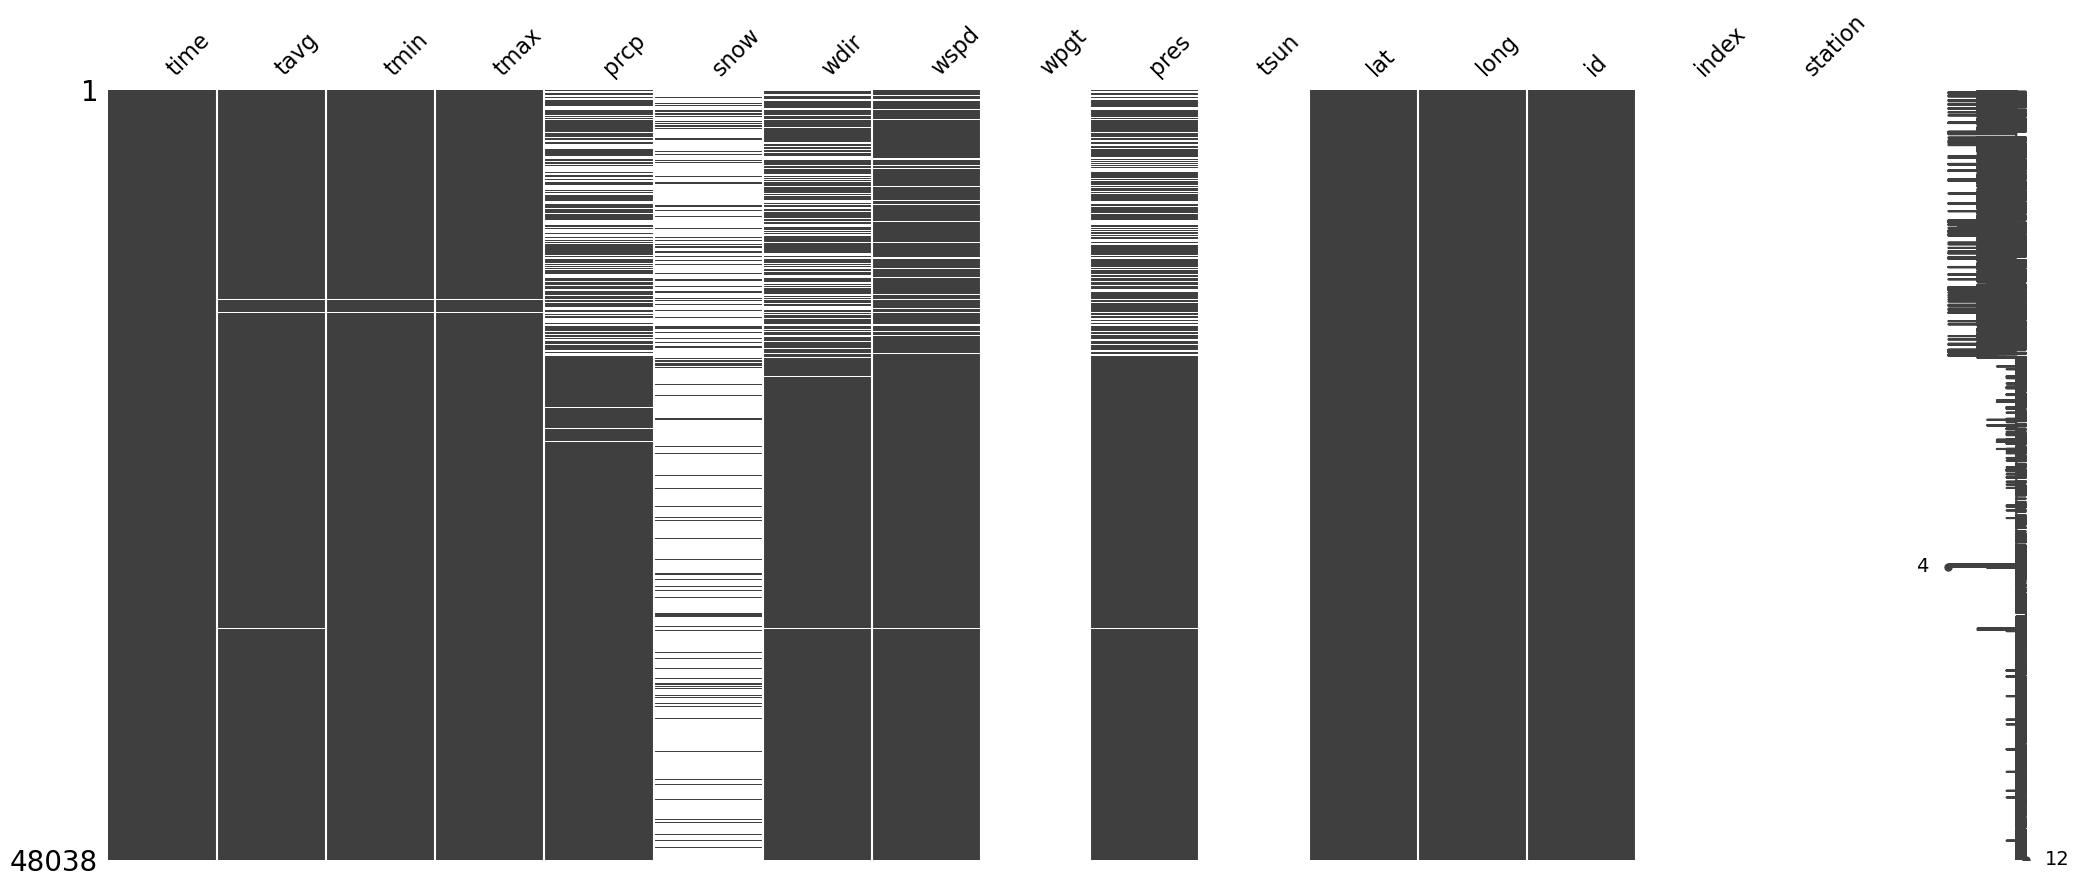

In [22]:
msno.matrix(weather)

In [23]:
weather.drop(columns = ['wpgt', 'tsun', 'index', 'station'], inplace = True)

<AxesSubplot: >

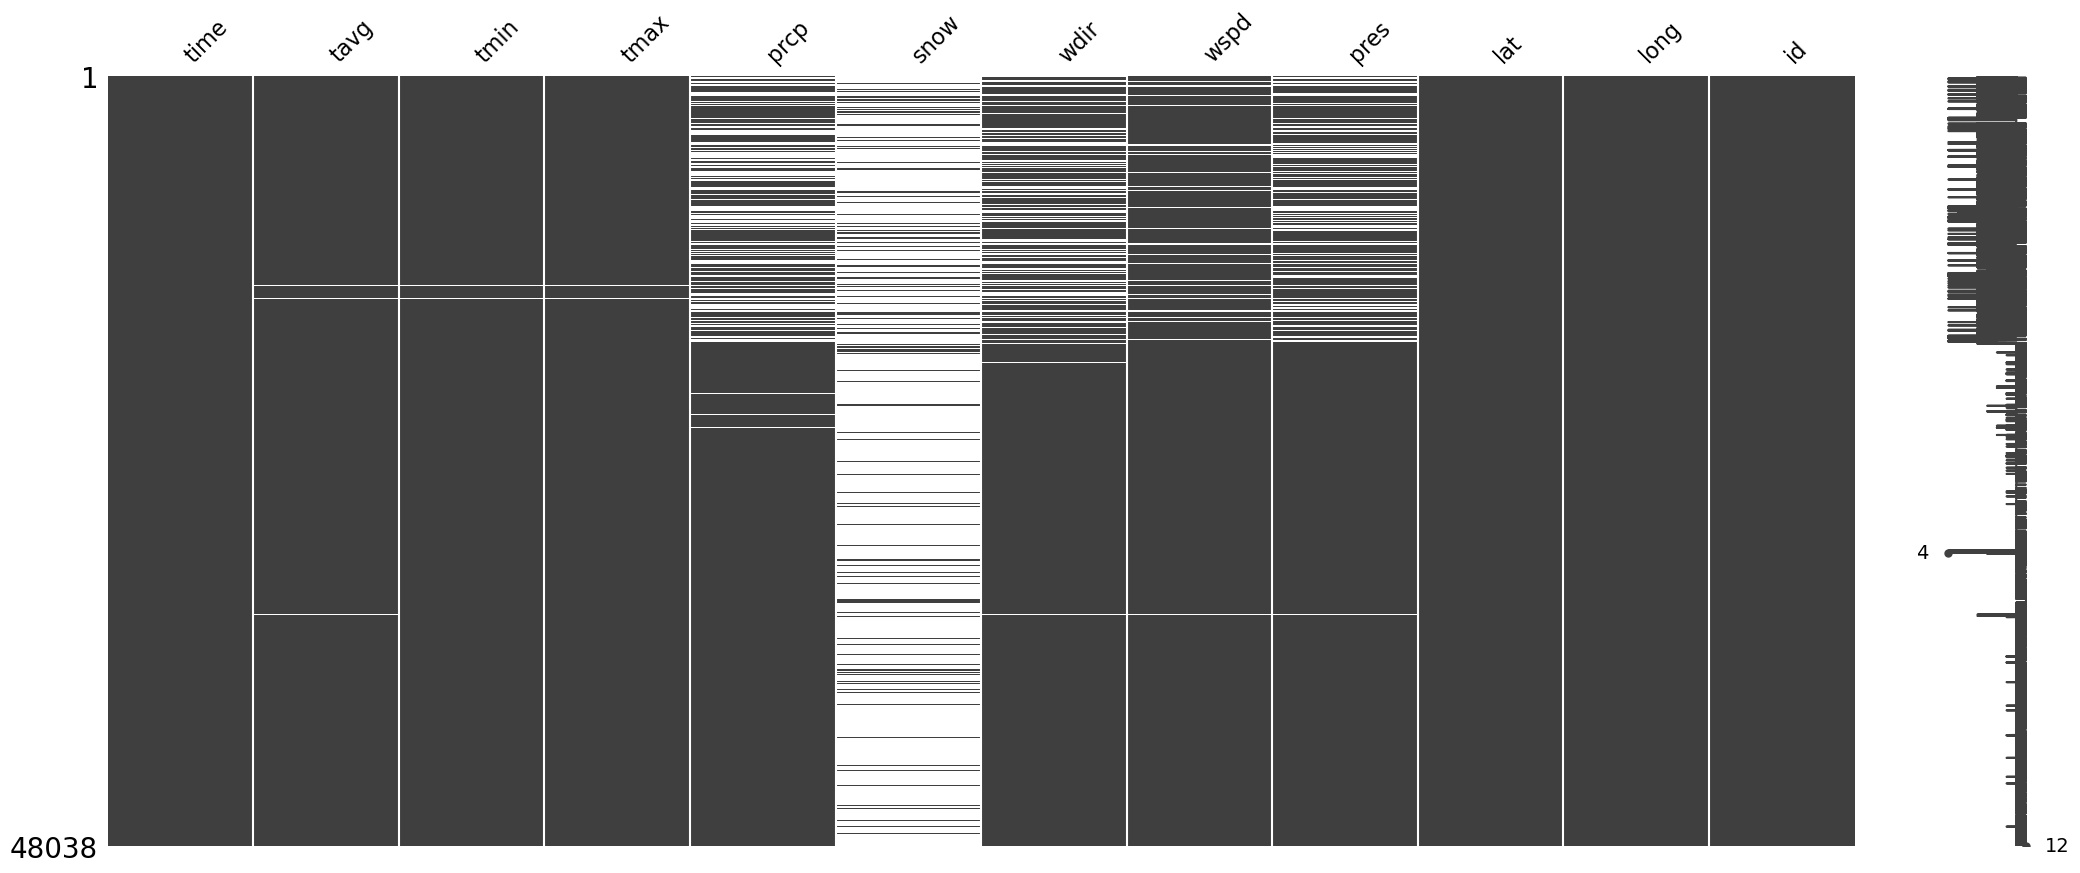

In [24]:
msno.matrix(weather)

In [39]:
weather['snow'].value_counts(dropna = False)

NaN     25949
0.0      3517
50.0        8
30.0        8
25.0        5
80.0        1
51.0        1
Name: snow, dtype: int64

In [40]:
weather['prcp'].value_counts(dropna = False)

0.0     17969
NaN      5565
0.3       423
0.1       359
0.5       292
        ...  
21.1        1
41.4        1
19.9        1
35.0        1
41.6        1
Name: prcp, Length: 309, dtype: int64

In [46]:
weather['snow'].fillna(0, inplace = True)
weather['prcp'].fillna(0, inplace = True)

In [47]:
weather['wdir'].value_counts(dropna = False)

NaN      4277
344.0     166
343.0     160
356.0     151
338.0     147
         ... 
111.0      26
63.0       26
128.0      25
153.0      24
360.0       2
Name: wdir, Length: 362, dtype: int64

In [60]:
weather['wspd'].value_counts(dropna = False)

NaN     1587
9.4      406
10.8     373
9.0      362
12.2     354
        ... 
35.7       1
38.7       1
35.9       1
34.7       1
39.2       1
Name: wspd, Length: 389, dtype: int64

In [58]:
weather['pres'].sort_values().unique()

array([ 993.1,  994.1,  994.2,  994.5,  994.6,  994.7,  995.3,  995.4,
        996.5,  996.6,  996.7,  996.9,  997.1,  997.2,  997.3,  997.5,
        997.6,  997.7,  998. ,  998.1,  998.2,  998.4,  998.5,  998.6,
        998.7,  998.8,  998.9,  999. ,  999.1,  999.2,  999.3,  999.4,
        999.5,  999.6,  999.7,  999.8,  999.9, 1000. , 1000.1, 1000.2,
       1000.3, 1000.4, 1000.5, 1000.6, 1000.7, 1000.9, 1001. , 1001.1,
       1001.2, 1001.3, 1001.4, 1001.5, 1001.6, 1001.7, 1001.8, 1001.9,
       1002. , 1002.1, 1002.2, 1002.3, 1002.4, 1002.5, 1002.6, 1002.7,
       1002.8, 1002.9, 1003. , 1003.1, 1003.2, 1003.3, 1003.4, 1003.5,
       1003.6, 1003.7, 1003.8, 1003.9, 1004. , 1004.1, 1004.2, 1004.3,
       1004.4, 1004.5, 1004.6, 1004.7, 1004.8, 1004.9, 1005. , 1005.1,
       1005.2, 1005.3, 1005.4, 1005.5, 1005.6, 1005.7, 1005.8, 1005.9,
       1006. , 1006.1, 1006.2, 1006.3, 1006.4, 1006.5, 1006.6, 1006.7,
       1006.8, 1006.9, 1007. , 1007.1, 1007.2, 1007.3, 1007.4, 1007.5,
      

In [67]:
4277/29489

0.14503713249008104

In [79]:
len(weather['lat'].unique())

5668

In [30]:
nasa = pd.read_csv('../../data/raw/weather.csv', index_col = 'Unnamed: 0')
nasa.head()

,YEAR,MO,DY,T2M,T2M_MAX,QV2M,PRECTOTCORR,WS2M,WS2M_MAX,WS10M,WS10M_MAX,GWETTOP,GWETPROF,LAT,LONG,ID
0,2020,7,22,32.63,38.06,12.02,0.16,1.26,2.77,1.71,3.84,0.12,0.38,33.195810,-111.348700,0
1,2020,7,23,27.17,30.01,14.40,2.44,1.56,3.41,2.08,4.52,0.19,0.38,33.195810,-111.348700,0
0,2020,7,19,24.80,33.19,5.92,0.00,1.76,3.42,2.61,4.52,0.31,0.37,40.602563,-115.719777,1
1,2020,7,20,24.31,32.47,6.53,2.53,1.79,3.16,2.70,4.12,0.36,0.37,40.602563,-115.719777,1
2,2020,7,21,22.90,31.65,8.36,0.07,2.60,7.44,3.72,10.50,0.33,0.37,40.602563,-115.719777,1
